# Laptops Info Recommendation System

# 

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [2]:
df = pd.read_csv("C:/Users/Admin/Desktop/Tableau/Laptop_dataset.csv")

In [3]:
df.head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           205 non-null    object 
 1   laptop_name     204 non-null    object 
 2   display_size    205 non-null    float64
 3   processor_type  205 non-null    object 
 4   graphics_card   205 non-null    object 
 5   disk_space      205 non-null    object 
 6   discount_price  205 non-null    float64
 7   old_price       205 non-null    float64
 8   ratings_5max    205 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.5+ KB


In [5]:
df.isna().sum()

brand             0
laptop_name       1
display_size      0
processor_type    0
graphics_card     0
disk_space        0
discount_price    0
old_price         0
ratings_5max      0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.drop_duplicates(keep = False, inplace = True)

In [9]:
df['brand'].unique()

array(['HP', 'Huawei', 'Dell', 'Asus', 'Apple', 'Acer', 'Lenovo',
       'Microsoft', 'MSI'], dtype=object)

In [11]:
df.groupby('brand').mean().round(2)

,display_size,discount_price,old_price
brand,,,
Acer,15.02,2562.55,2843.45
Apple,13.95,7417.60,7795.60
Asus,15.02,2972.64,3393.09
Dell,14.84,3782.91,3872.03
HP,14.56,3244.11,3403.04
Huawei,14.40,3615.67,4040.67
Lenovo,14.99,2091.94,2295.47
MSI,18.40,9071.00,9071.00
Microsoft,13.50,5132.33,5132.33


Splitting the Rating column

In [19]:
df[['Rating','Out_of']] = df.ratings_5max.str.split("/", expand=True,)
df

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max,Rating,Out_of
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5,0,5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5,0,5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5,0,5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5,0,5
5,Dell,Vostro 5471,14.0,Intel Core i7-8550U,AMD Radeon 530 (4 GB),128 GB SSD/1 TB HDD,3799.0,3799.0,3.8 / 5,3.8,5
...,...,...,...,...,...,...,...,...,...,...,...
200,Lenovo,IdeaPad 320-15IKBRN,15.6,Intel Core i5-8250U,Intel GMA HD,1 TB HDD,2099.0,2099.0,3.8 / 5,3.8,5
201,Huawei,MateBook D,15.6,Intel Core i7-8550U,NVIDIA GeForce MX150 (2 GB),128 GB SSD/1 TB HDD,3299.0,3299.0,4.0 / 5,4.0,5
202,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 555X GDDR5 (4 GB),256 GB SSD,10199.0,10199.0,0 / 5,0,5
203,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,11899.0,11899.0,4.4 / 5,4.4,5


Now droping the unwanted column

In [22]:
df.drop(["ratings_5max"], axis='columns', inplace=True)

In [24]:
df.shape

(183, 10)

In [25]:
df.head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,Rating,Out_of
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0,5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0,5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0,5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0,5
5,Dell,Vostro 5471,14.0,Intel Core i7-8550U,AMD Radeon 530 (4 GB),128 GB SSD/1 TB HDD,3799.0,3799.0,3.8,5


# 

# Average Rating for each Brand

<BarContainer object of 183 artists>

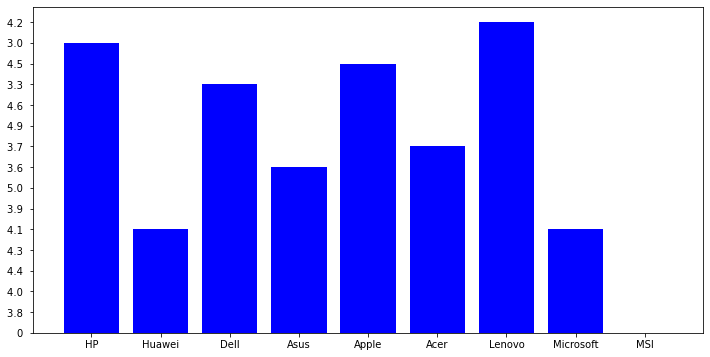

In [94]:
plt.figure(figsize=(12,6))
plt.bar(df['brand'], df['Rating'], color ='blue')

# 

# Top 3 Based On Highest Old Price

In [26]:
df.sort_values(by = 'old_price', ascending = False).head(3)

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,Rating,Out_of
132,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i9,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,12499.0,12499.0,0,5
144,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,10699.0,11899.0,4.4,5
203,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,11899.0,11899.0,4.4,5


# 

# Top 3 based on lowest Price

In [12]:
df.sort_values(by = 'old_price').head(3)

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
112,Acer,Aspire 1 A114-31,14.0,Intel Celeron N3350,Intel HD Graphics 500,64 GB (eMMC),999.0,999.0,0 / 5
108,Acer,Aspire 1 A114-31-C6WP,14.0,Intel Celeron N3350,Intel HD Graphics 505,64 GB (eMMC),999.0,999.0,0 / 5
106,HP,Stream 14-cb003nx,14.0,Intel Celeron N3060,Intel HD Graphics 400,32 GB (eMMC),1049.0,1049.0,0 / 5


# 

# Describing every brand in the dataset and sort the brand by the highest old price

In [42]:
def laptopbrand(x):
    y = df[['brand','laptop_name','display_size','processor_type', 'graphics_card', 
            'disk_space', 'discount_price', 'old_price', 'Rating']][df["brand"] == x]
    y = y.sort_values(by="brand",ascending=False)
    return y

In [95]:
x = laptopbrand('Apple')
x.sort_values(by='old_price',ascending=False)

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,Rating
132,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i9,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,12499.00,12499.00,0
144,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,10699.00,11899.00,4.4
203,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,11899.00,11899.00,4.4
131,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 555X GDDR5 (4 GB),256 GB SSD,10799.00,10799.00,0
14,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 555X GDDR5 (4 GB),256 GB SSD,9099.00,10199.00,0
202,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 555X GDDR5 (4 GB),256 GB SSD,10199.00,10199.00,0
134,Apple,MacBook Pro (Retina + Touch Bar),13.3,Intel Core i5 Quad Core,Intel Iris Plus Graphics 655,512 GB SSD,8699.00,8699.00,0
16,Apple,MacBook Pro (Retina + Touch Bar),13.3,Intel Core i5 Quad Core,Intel Iris Plus Graphics 655,512 GB SSD,7599.00,8499.00,4.4
168,Apple,MacBook Pro (Retina + Touch Bar),13.3,Intel Core i5 Dual Core,Intel Iris Plus Graphics 650,512 GB SSD,8499.00,8499.00,0
164,Apple,MacBook Pro (Retina),15.4,Intel Core i7 Quad Core,Intel Iris Pro Graphics,256 GB SSD,8189.00,8189.00,4.5


## Summary Of Apple Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


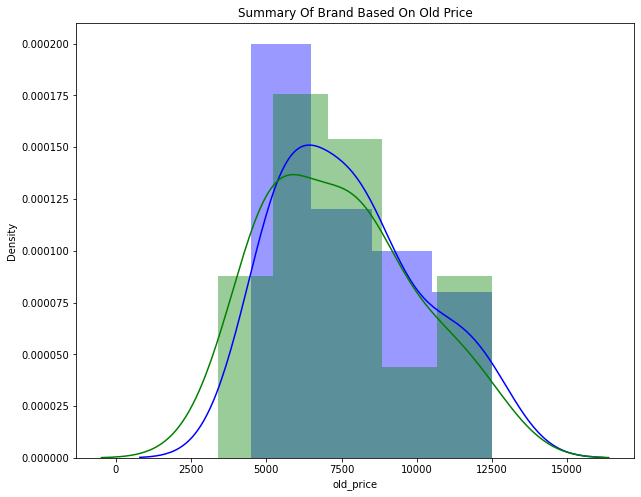

In [96]:
plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of Apple Based On Old Price')
plt.show()

## Summary Of HP Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


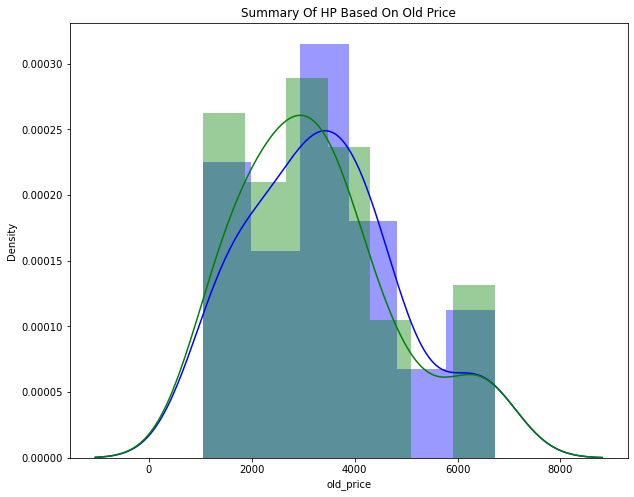

In [98]:
x = laptopbrand('HP')
x.sort_values(by='old_price',ascending=False)

plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of HP Based On Old Price')
plt.show()

## Summary Of Dell Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


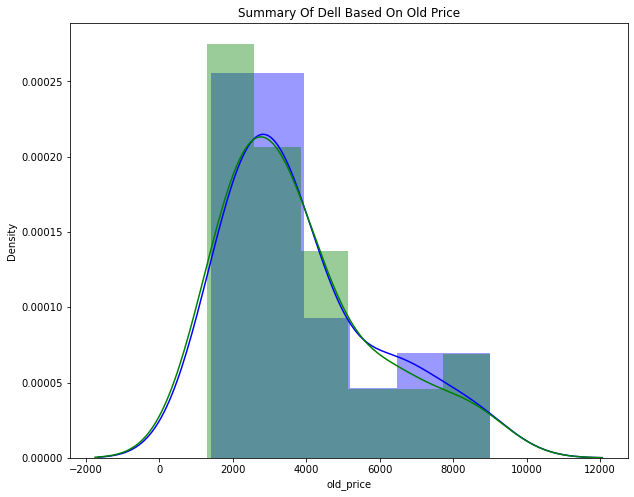

In [101]:
x = laptopbrand('Dell')
x.sort_values(by='old_price',ascending=False)

plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of Dell Based On Old Price')
plt.show()

## Summary Of Lenovo Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


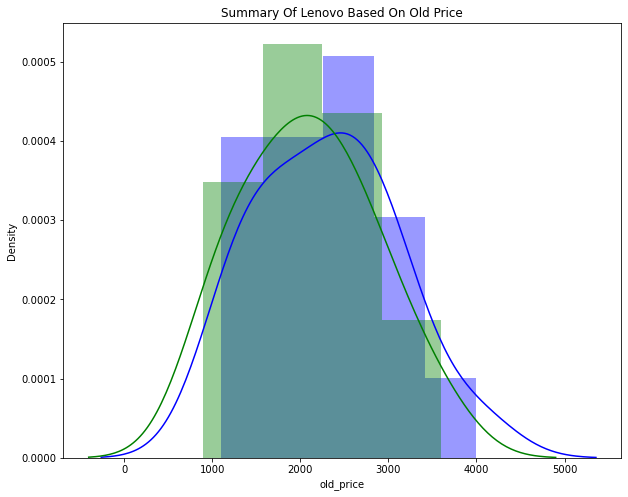

In [102]:
x = laptopbrand('Lenovo')
x.sort_values(by='old_price',ascending=False)

plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of Lenovo Based On Old Price')
plt.show()

## Summary Of Huawei Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


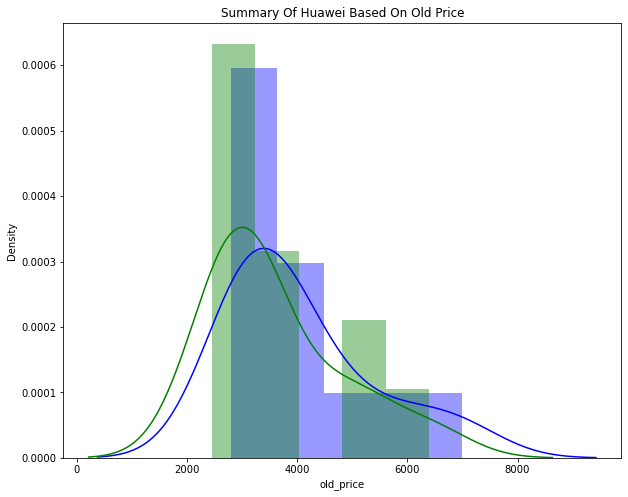

In [103]:
x = laptopbrand("Huawei")
x.sort_values(by='old_price',ascending=False)

plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of Huawei Based On Old Price')
plt.show()

## Summary Of Asus Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


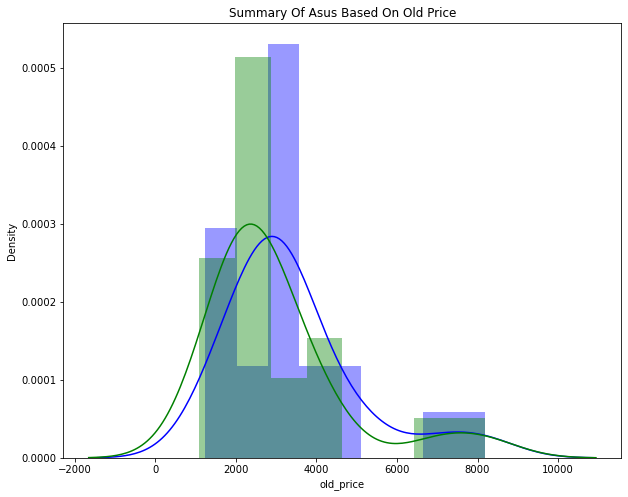

In [105]:
x = laptopbrand("Asus")
x.sort_values(by='old_price',ascending=False)

plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of Asus Based On Old Price')
plt.show()


## Summary Of Acer Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


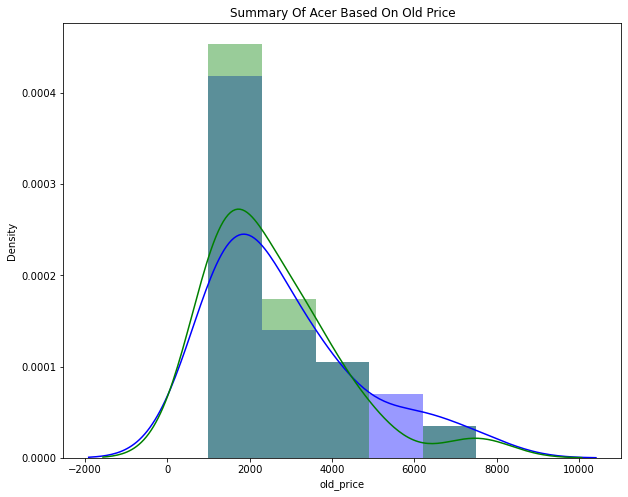

In [107]:
x = laptopbrand("Acer")
x.sort_values(by='old_price',ascending=False)

plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of Acer Based On Old Price')
plt.show()


## Summary Of Microsoft Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


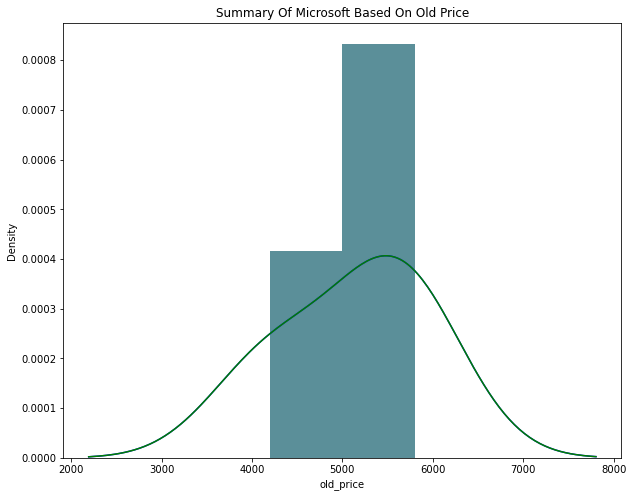

In [108]:
x = laptopbrand("Microsoft")
x.sort_values(by='old_price',ascending=False)

plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of Microsoft Based On Old Price')
plt.show()


## Summary Of MSI Based On Old Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping 

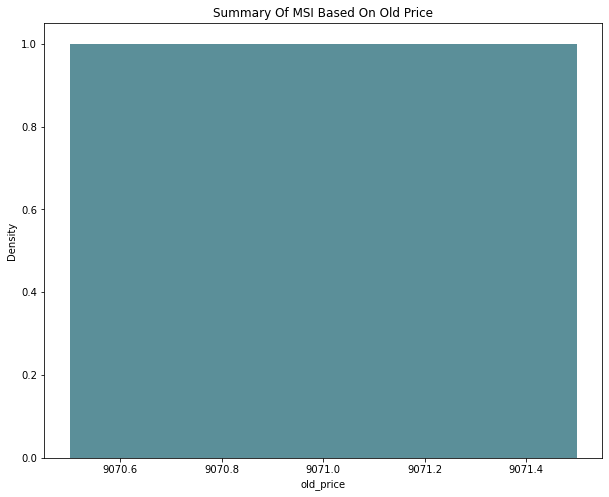

In [110]:
x = laptopbrand('MSI')
x.sort_values(by='old_price',ascending=False)

plt.figure(figsize=(10,8))
sns.distplot(x['old_price'], color = 'blue', label = 'old_price')
sns.distplot([x['discount_price']], color = 'green', label = 'discount_price')
plt.title('Summary Of MSI Based On Old Price')
plt.show()


# 

# Kolmogorov-Smirnov Goodness of Fit Test (K-S test)

The Kolmogorov-Smirnov Goodness of Fit Test (K-S test) compares data with a known distribution. Although the test is nonparametric — it doesn’t assume any particular underlying distribution — it is commonly used as a test for normality to see if the data is normally distributed.

In [68]:
df['Difference'] = df['old_price'] - df['discount_price']

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


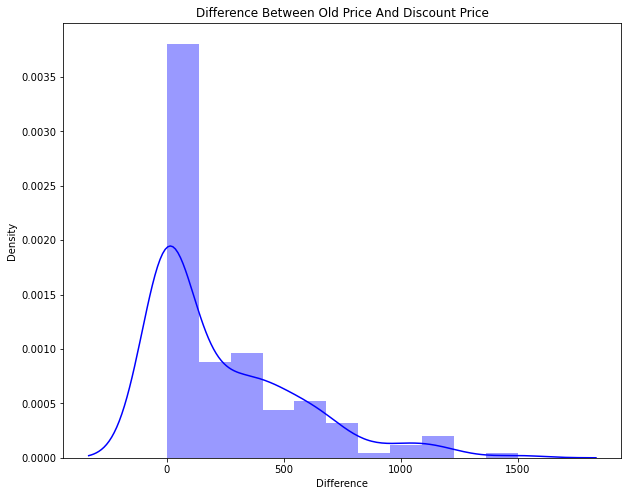

In [93]:
plt.figure(figsize=(10,8))
sns.distplot(df['Difference'], color = 'blue')
plt.title('Difference Between Old Price And Discount Price')
plt.show()

# 

# Spearman Rank Test

Spearman's rank-order correlation is the nonparametric test. Spearman's correlation coefficient measures the strength and direction of the association between two ranked variables.

In [71]:
df[['old_price', 'discount_price']].corr(method = 'spearman')

,old_price,discount_price
old_price,1.000000,0.986479
discount_price,0.986479,1.000000


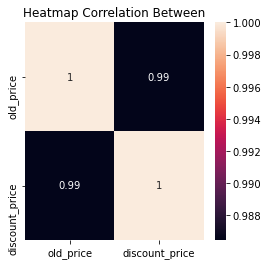

In [92]:
plt.figure(figsize=(4,4))
sns.heatmap(df[['old_price', 'discount_price']].corr(method = 'spearman'), annot=True, color = 'blue')
plt.title('Heatmap Correlation Between')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


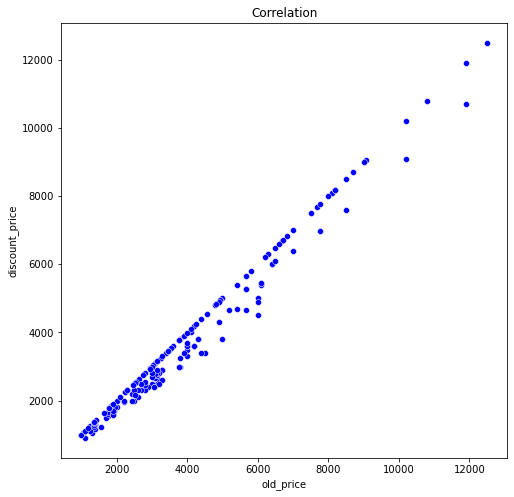

In [91]:
plt.figure(figsize=(8,8))
sns.scatterplot(df['old_price'],df['discount_price'], color = 'blue' )
plt.title('Correlation')
plt.show()

# 

# Conclusion:

The data is not normally distributed based on The Kolmogorov-Smirnov Goodness of Fit Test (K-S test). The hypothesis is declined.

Based on Spearman Rank Test, there is a correlation between old price and discount price as seen on the scatter plot called monotonic relationship. In a monotonic relationship, the variables tend to move in the same relative direction, but not necessarily at a constant rate.